# **SCANSCIENCE**
> This is my bangkit capstone project ML model, still need improvement

# **1. Preparation Phase**

In [ ]:
# set- up connection between drive and google collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### 1.1. Set data directiory path in google drive

In [ ]:
# set path for the train-val data form the google drive
train_dir = '/content/drive/MyDrive/ScanScienceDataset/training'
validation_dir = '/content/drive/MyDrive/ScanScienceDataset/validation'

# **2. Data Augmentation**

**NOTE:**

1.   data size        : 256x256 px,
2.   color            : RGB
3.   Dataset classes  : 32 animals (24 used)









In [ ]:
# define data size and channel
img_rows, img_cols, img_channel = 256, 256, 3

In [ ]:
# Train Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode='categorical',
                                                    batch_size=64,
                                                    target_size=(img_rows, img_cols))

Found 7050 images belonging to 24 classes.


In [ ]:
# Validation Data Augmentation
val_datagen = ImageDataGenerator(rescale=1./255.)

validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                       class_mode='categorical',
                                                       batch_size=32,
                                                       target_size=(img_rows, img_cols))

Found 757 images belonging to 24 classes.


# **3. Create Model**

### **3.1. Machine Learning Model**

In [ ]:
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model (excluding the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

# Freeze the layers of the pre-trained VGG16 model
base_model.trainable = False

# Create a new model by adding your classification layers on top of VGG16
model = Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(24, activation='softmax')
])

58889256/58889256 [==============================] - 0s 0us/step


### **3.2. Callback Function**

In [ ]:
# Custom Callback
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85):
                print("\n Accuracy is more than 85%, stopping...")
                self.model.stop_training = True

mycallback = myCallback()

In [ ]:
# learning rate scheduler
from tensorflow.keras.callbacks import LearningRateScheduler

def schedule(epoch, lr):
    if epoch < 10:
        return 0.001
    elif epoch < 20:
        return 0.0001
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(schedule)

In [ ]:
# Early Stopping callbacks
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

# **4. Training Model**

In [ ]:
#model = build_model(pre_trained_model,num_classes=27)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 4096)              134221824 
                                                                 
 dense_5 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_6 (Dense)             (None, 24)                98328     
                                                                 
Total params: 165816152 (632.54 MB)
Trainable params: 151101464 (576.41 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:

epochs = 50  # @param {type: "slider", min:10, max:100}
hist = model.fit(train_generator,
                 epochs=epochs,
                 verbose = 1,
                 validation_data=validation_generator,
                 callbacks = [lr_scheduler, early_stopping, mycallback])

Epoch 1/50
111/111 [==============================] - 169s 1s/step - loss: 3.6358 - accuracy: 0.3804 - val_loss: 1.1960 - val_accuracy: 0.6063 - lr: 0.0010
Epoch 2/50
111/111 [==============================] - 136s 1s/step - loss: 0.9256 - accuracy: 0.7072 - val_loss: 0.8465 - val_accuracy: 0.7437 - lr: 0.0010
Epoch 3/50
111/111 [==============================] - 137s 1s/step - loss: 0.6855 - accuracy: 0.7793 - val_loss: 0.8135 - val_accuracy: 0.7622 - lr: 0.0010
Epoch 4/50
111/111 [==============================] - 139s 1s/step - loss: 0.5151 - accuracy: 0.8325 - val_loss: 0.7827 - val_accuracy: 0.7569 - lr: 0.0010
Epoch 5/50
111/111 [==============================] - 139s 1s/step - loss: 0.4545 - accuracy: 0.8522 - val_loss: 0.7574 - val_accuracy: 0.7966 - lr: 0.0010
Epoch 6/50
111/111 [==============================] - 136s 1s/step - loss: 0.4033 - accuracy: 0.8657 - val_loss: 0.8025 - val_accuracy: 0.7715 - lr: 0.0010
Epoch 7/50
111/111 [==============================] - 136s 1s/st

# **5. Model Evaluation**



>In this section, we try to plot the performance of the ML model based on the epoch. We use accuracy and loss from both training and validation score from the model.






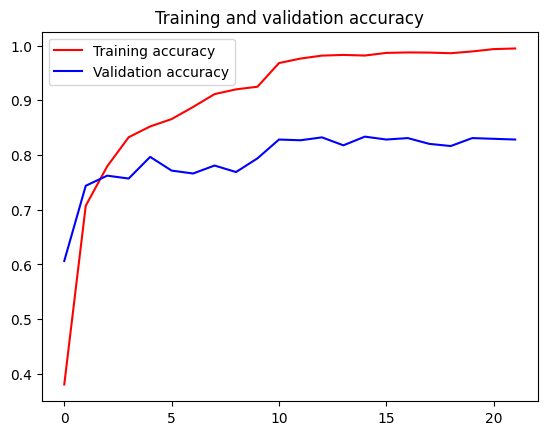

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
def saveModel(versi, model):
    filepath = "drive/MyDrive/ScanScienceDataset/dataset/model_ml_" + versi + ".h5"
    model.save(filepath)

saveModel('1',model)